# Plots

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

In [67]:
df_tweets = pd.read_pickle('../data/processed/tweets.pkl')
df_abusive = pd.read_pickle('../data/processed/abusive.pkl')

df_mptweets = pd.read_pickle('../data/interim/FemaleMPTweets.pkl')

df_mps = pd.read_pickle('../data/interim/tweeted_at.pkl')
df_htags = pd.read_pickle('../data/interim/hashtag_indices.pkl')

In [97]:
from functools import reduce

def filter_handle(handles, query='GUID >= 0', df=df_tweets):
    index_list = df_mps[df_mps['twitter_handles'].isin(['@' + handle for handle in handles])]['Mentions'].values
    indices = reduce(lambda x, y : set(x) | set(y), index_list)
    return df.loc[indices, :].query(query)
    
def filter_tag(tags, query='GUID >= 0', df=df_tweets):
    index_list = df_htags[df_htags['Hashtag'].isin(['#' + tag for tag in tags])]['Indices'].values
    indices = reduce(lambda x, y : set(x) | set(y), index_list)
    return df.loc[indices, :].query(query)

In [69]:
df_mps.columns

Index(['twitter_handles', 'Mentions', 'Counts'], dtype='object')

In [70]:
df_dabbot = filter_handle(['HackneyAbbott'])

In [71]:
df_dabbot['Date (GMT)'] = df_dabbot['Date (GMT)'].map(lambda x: x.date())

In [72]:
grouped_df =  df_dabbot.groupby('Date (GMT)').size()
by_day = pd.DataFrame({'Date': grouped_df.index,
              'Count': grouped_df.values})
by_day.head()

,Count,Date
0,265,2017-01-01
1,280,2017-01-02
2,806,2017-01-03
3,815,2017-01-04
4,753,2017-01-05


,GUID,Date (GMT),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,...,Source,Klout Score,Gender,Posts,Followers,Following,Tweeted At,Hashtags,Clean Contents,abusive
23689,872539040586903552,2017-06-07 19:41:00,http://twitter.com/cjanehearn/status/872539040...,RT @amandamilling A big thanks to @Patrick4Dal...,@cjanehearn,Jane Hearn,NaN,NaN,NaN,NaN,...,Twitter,24.0,F,2358.0,130.0,320.0,"[@amandamilling, @Patrick4Dales]",[],A big thanks to for joining us on the campaig...,False
24296,872530811635081217,2017-06-07 19:08:00,http://twitter.com/TIMJ196701/status/872530811...,@eduardo_LACS Tory MP @amandamilling appears t...,@TIMJ196701,Tim Jones,NaN,NaN,NaN,NaN,...,Twitter,42.0,M,2613.0,176.0,196.0,"[@eduardo_LACS, @amandamilling]",[],Tory MP appears to believe that there is not ...,False
24523,872527344396906496,2017-06-07 18:55:00,http://twitter.com/Kimariecotter1/status/87252...,@ExpressandStar @amandamilling I am disgusted ...,@Kimariecotter1,kim Cotter,United Kingdom,West Midlands,Stoke,NaN,...,Twitter,39.0,F,5011.0,72.0,193.0,"[@ExpressandStar, @amandamilling]",[],I am disgusted by the way that this paper has ...,False
24672,872525258431111171,2017-06-07 18:46:00,http://twitter.com/amandamilling/status/872525...,RT @cdegw @amandamilling hope thirsty is worki...,@amandamilling,Amanda Milling,NaN,NaN,NaN,NaN,...,Twitter,57.0,F,1750.0,3879.0,1154.0,"[@cdegw, @amandamilling]",[],hope thirsty is working hard on the campaign f...,False
24691,872524908118540288,2017-06-07 18:45:00,http://twitter.com/NSoames/status/872524908118...,RT @amandamilling A big thanks to @Patrick4Dal...,@NSoames,Nicholas Soames,United Kingdom,South East,Brighton,NaN,...,Twitter,NaN,M,11720.0,26458.0,1545.0,"[@amandamilling, @Patrick4Dales]",[],A big thanks to for joining us on the campaig...,False
24739,872524416449695749,2017-06-07 18:43:00,http://twitter.com/tory_zone/status/8725244164...,RT @amandamilling A big thanks to @Patrick4Dal...,@tory_zone,Conservative Zone,Indonesia,NaN,NaN,NaN,...,Twitter,46.0,NaN,82827.0,1137.0,263.0,"[@amandamilling, @Patrick4Dales]",[],A big thanks to for joining us on the campaig...,False
24740,872524464550014977,2017-06-07 18:43:00,http://twitter.com/amandamilling/status/872524...,RT @JamesHwwfc @amandamilling good luck tomorr...,@amandamilling,Amanda Milling,NaN,NaN,NaN,NaN,...,Twitter,57.0,F,1746.0,3878.0,1154.0,"[@JamesHwwfc, @amandamilling]",[],good luck tomorrow wish I could vote for you a...,False
28317,872475905750433792,2017-06-07 15:30:00,http://twitter.com/JamesHwwfc/status/872475905...,@amandamilling good luck tomorrow wish I could...,@JamesHwwfc,James Hughes,United Kingdom,North West,Blackpool,NaN,...,Twitter,32.0,M,19434.0,323.0,270.0,[@amandamilling],[],good luck tomorrow wish I could vote for you a...,False
38045,872332242613403649,2017-06-07 05:59:00,http://twitter.com/PtbutlerP/status/8723322426...,@stanchers @bbcwm @amandamilling @Dadgey @Hack...,@PtbutlerP,Ptb,NaN,NaN,NaN,NaN,...,Twitter,41.0,NaN,18543.0,116.0,45.0,"[@stanchers, @bbcwm, @amandamilling, @Dadgey, ...",[],Says it all British people butchered on the st...,False
47214,872110735152820225,2017-06-06 15:19:00,http://twitter.com/DaveMJo1/status/87211073515...,@twcuddleston @Dadgey Our local Tory Mp @amand...,@DaveMJo1,Dave MJ,United Kingdom,NaN,NaN,NaN,...,Twitter,37.0,M,5539.0,86.0,88.0,"[@twcuddleston, @Dadgey, @amandamilling]",[#Cannock],"Our local Tory Mp is missing in action, hopin...",False


In [101]:
import matplotlib.dates as mdates

def filter_plot(handles=[], tags=[], query=None, df=df_tweets):
    if query:
        if handles:
            df = filter_handle(handles, query, df)
        if tags:
            df = filter_tag(handles, query, df)
    else:
        if handles:
            df = filter_handle(handles, df=df)
        if tags:
            df = filter_tag(tags, df=df)
    df['Date (GMT)'] = df['Date (GMT)'].map(lambda x: x.date())
    grouped_df =  df_dabbot.groupby('Date (GMT)').size()
    by_day = pd.DataFrame({'Date': grouped_df.index,
                           'Count': grouped_df.values})

    fig, ax = plt.subplots()
    ax.plot(by_day['Date'], by_day['Count'])

    weeks = mdates.DayLocator(interval=14)   # every fortnight
    days = mdates.DayLocator()  # every hour
    daysFmt = mdates.DateFormatter('%d/%m/%y')

    # format the ticks
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)

    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    fig.autofmt_xdate()    

    plt.show()
    

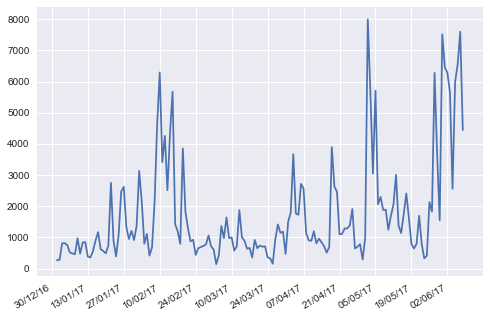

In [102]:
filter_plot(['HackneyAbbot', 'AmberRuddHR'], ['GE2017'])